In [14]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
matplotlib.rc('xtick', labelsize=14) 
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

def list2file(listname,file):
    with open(file,'w') as f:
        for item in listname:
            f.write("%s" % item)

Populating the interactive namespace from numpy and matplotlib


In [21]:
with open('data/output.txt') as file:
    content = file.readlines()
timings = []
for line in content:
    
    if 'Accuracy' not in line and line != "\n" and line.strip() is not None:
        timings.append(line)

list2file(timings, 'data/output.csv')

8.421637


/home/praateek/miniconda3/envs/twitter/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


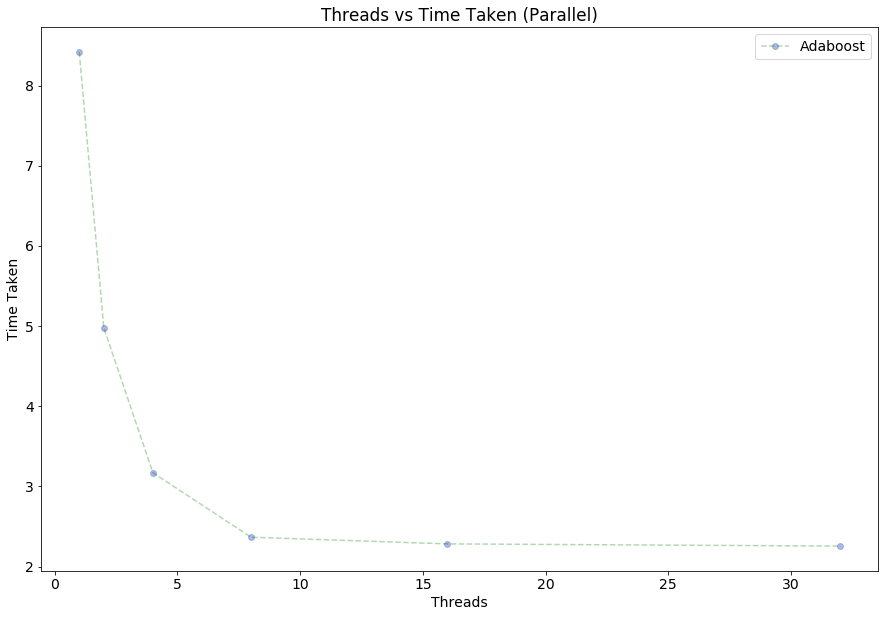

In [25]:
df = pd.read_csv("data/output.csv", delimiter="\t", header=None,names=["sec","micro", "thread"])

df["time"] = df["sec"] + df["micro"] * 10**-6

gp = df.groupby('thread')['time']

fig, ax = plt.subplots(figsize=(15, 10))
means = gp.median().sort_values(ascending=False)

plt.plot(df.thread.unique(),means.as_matrix(), color='green', linestyle='--', marker='o',
     markerfacecolor='blue', markersize=6, label='Adaboost', alpha=0.3)

ax.set_title("Threads vs Time Taken (Parallel)")
ax.set_xlabel("Threads")
ax.set_ylabel("Time Taken")
plt.legend()
print(means[1])

NameError: name 'means1' is not defined

/home/praateek/miniconda3/envs/twitter/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


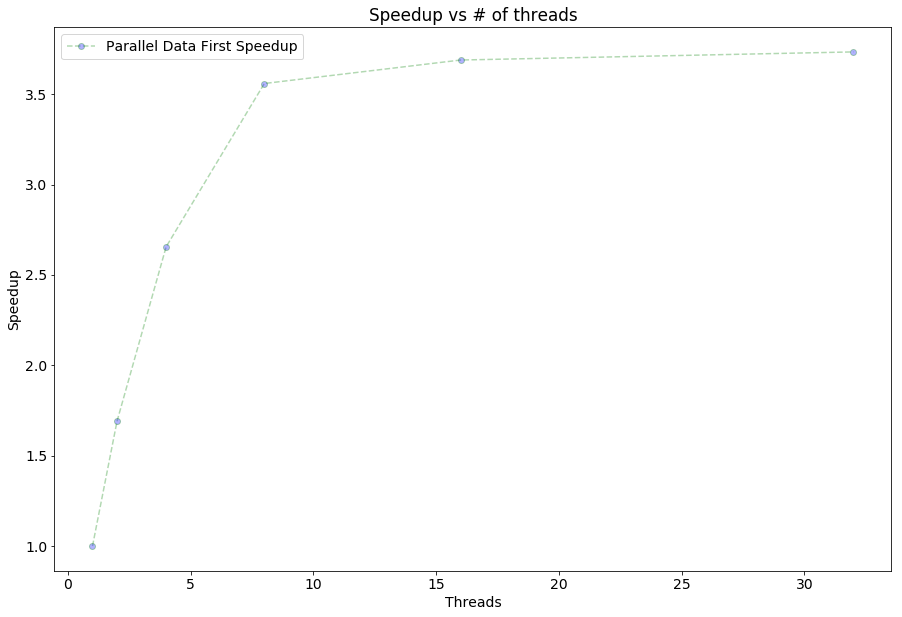

In [27]:
df = pd.read_csv("data/output.csv", delimiter="\t", header=None,names=["sec","micro", "thread"])

df["time"] = df["sec"] + df["micro"] * 10**-6

gp = df.groupby('thread')['time']

s = 73.637846
s1 = 74.147029

fig, ax = plt.subplots(figsize=(15, 10))
s = 8.421637
means = s/gp.median().sort_values(ascending=False)



plt.plot(df.thread.unique(),means.as_matrix(), color='green', linestyle='--', marker='o',
     markerfacecolor='blue', markersize=6, label='Parallel Data First Speedup', alpha=0.3)
ax.set_title("Speedup vs # of threads")
ax.set_xlabel("Threads")
ax.set_ylabel("Speedup")

plt.legend()

print(means,means1)